In [1]:
import zipfile 
import pysal as ps
%matplotlib inline
import numpy as np
import ast
import json
import urllib
import urllib2
from cStringIO import StringIO
import pandas as pd
import requests
import os
import geopandas as gpd
import matplotlib.pylab as pl
from fiona.crs import from_epsg
import matplotlib.pylab as pl
from matplotlib import colors
import shapely
import seaborn as sns
import gzip
import mapreduce as mr
import csv


In [15]:
calif=gpd.GeoDataFrame.from_file('Data/cb_2016_06_tract_500k/cb_2016_06_tract_500k.shp')

In [16]:
calif.head()

,AFFGEOID,ALAND,AWATER,COUNTYFP,GEOID,LSAD,NAME,STATEFP,TRACTCE,geometry
0,1400000US06013359103,2593523,1170833,013,06013359103,CT,3591.03,06,359103,"POLYGON ((-122.302287 37.995278, -122.299658 3..."
1,1400000US06013366001,1017166,0,013,06013366001,CT,3660.01,06,366001,"POLYGON ((-122.353307 37.978544, -122.352953 3..."
2,1400000US06013374000,992095,0,013,06013374000,CT,3740,06,374000,"POLYGON ((-122.347509 37.939984, -122.347471 3..."
3,1400000US06013388000,659857,0,013,06013388000,CT,3880,06,388000,"POLYGON ((-122.308489 37.911273, -122.304275 3..."
4,1400000US06017030710,7898800,0,017,06017030710,CT,307.10,06,030710,"POLYGON ((-121.081663 38.692493, -121.079227 3..."


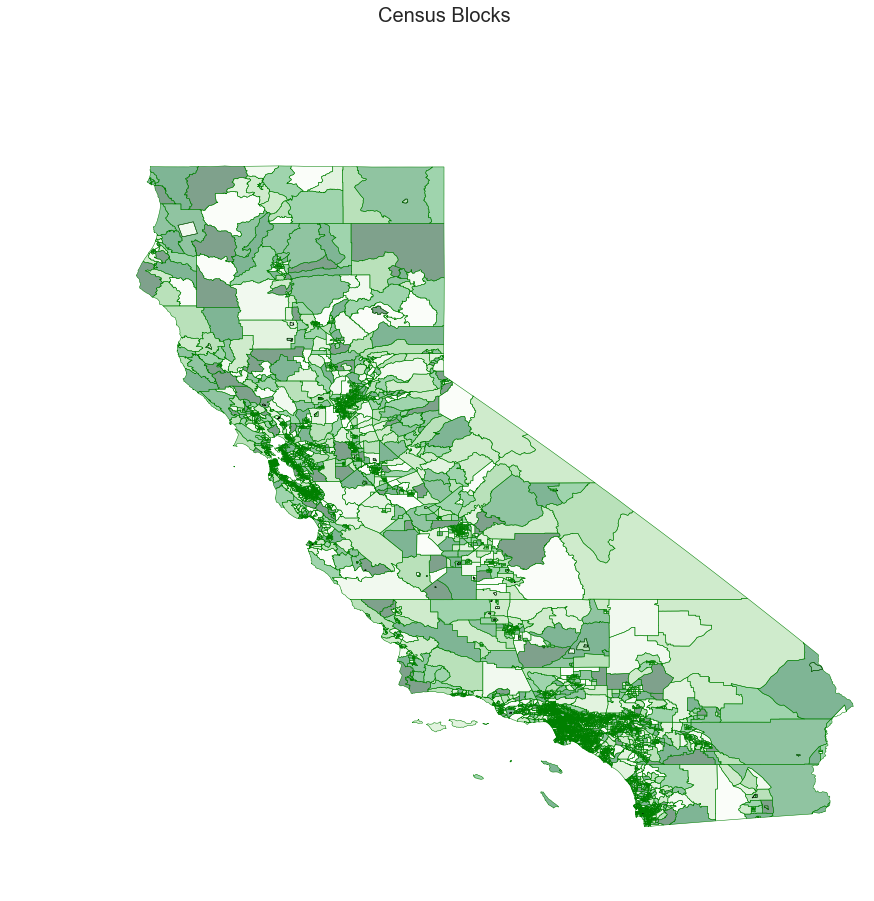

In [17]:
f, ax = pl.subplots(figsize=(15,15))
calif.plot(c = 'green', linewidth = .5, ax = ax,  cmap = 'Greens', label = 'parks')
#CensusBlocks[CensusBlocks["Within30min"] == True].plot(c = 'blue', linewidth = .5, ax = ax,  cmap = 'Blues', label = 'parks')
pl.axis('off')
ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("Census Blocks", size = 20)

06067   06

In [18]:
mask = []
for i in calif.GEOID:
    if '06067' in i:
        mask.append(True)
    else:
        mask.append(False)


In [19]:
calif[mask]

,AFFGEOID,ALAND,AWATER,COUNTYFP,GEOID,LSAD,NAME,STATEFP,TRACTCE,geometry
435,1400000US06067000300,1427327,2502,067,06067000300,CT,3,06,000300,"POLYGON ((-121.462834 38.578234, -121.461426 3..."
436,1400000US06067000500,866054,0,067,06067000500,CT,5,06,000500,"POLYGON ((-121.488659 38.584524, -121.488423 3..."
437,1400000US06067002500,984312,0,067,06067002500,CT,25,06,002500,"POLYGON ((-121.488236 38.55264, -121.487856 38..."
438,1400000US06067003204,1599411,0,067,06067003204,CT,32.04,06,003204,"POLYGON ((-121.427515 38.525077, -121.420091 3..."
439,1400000US06067004100,2033367,0,067,06067004100,CT,41,06,004100,"POLYGON ((-121.483144 38.521114, -121.478672 3..."
440,1400000US06067004402,1240513,0,067,06067004402,CT,44.02,06,004402,"POLYGON ((-121.46476 38.539527, -121.463748 38..."
441,1400000US06067004802,1423403,0,067,06067004802,CT,48.02,06,004802,"POLYGON ((-121.42921 38.501566, -121.428198 38..."
442,1400000US06067005002,3064830,0,067,06067005002,CT,50.02,06,005002,"POLYGON ((-121.441512 38.496108, -121.429081 3..."
443,1400000US06067005202,1759096,113923,067,06067005202,CT,52.02,06,005202,"POLYGON ((-121.409435 38.557678, -121.409265 3..."
444,1400000US06067005801,2640616,0,067,06067005801,CT,58.01,06,005801,"POLYGON ((-121.364566 38.601092, -121.364559 3..."


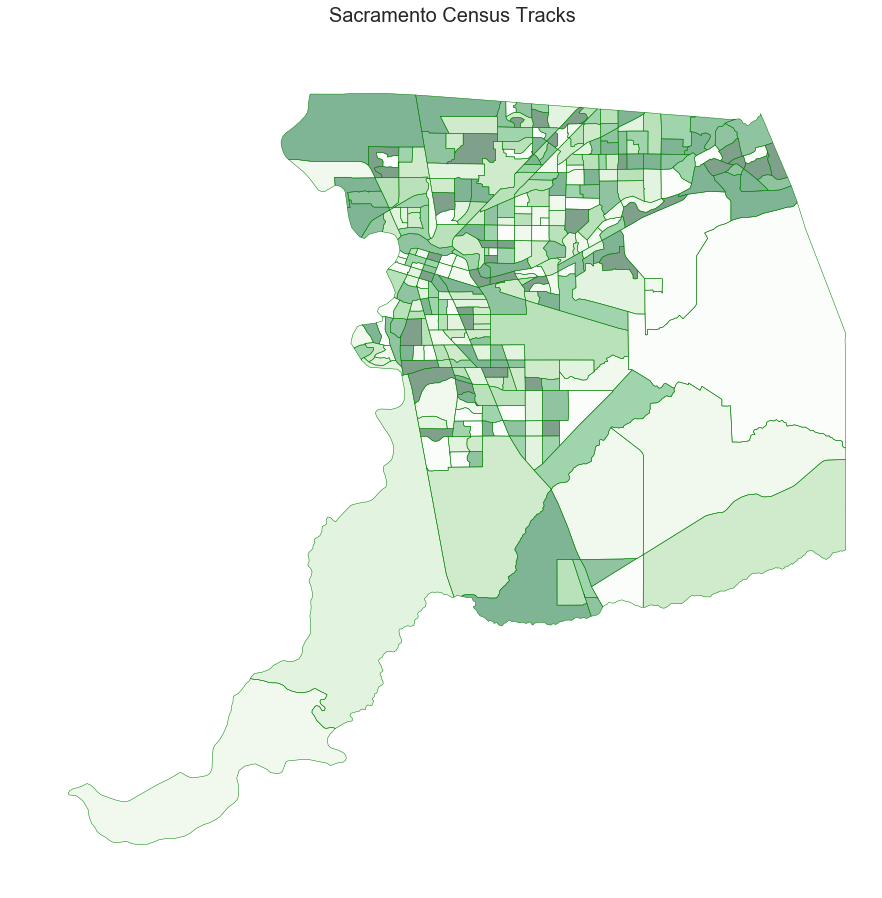

In [20]:
f, ax = pl.subplots(figsize=(15,15))
calif[mask].plot(c = 'green', linewidth = .5, ax = ax,  cmap = 'Greens', label = 'parks')
#CensusBlocks[CensusBlocks["Within30min"] == True].plot(c = 'blue', linewidth = .5, ax = ax,  cmap = 'Blues', label = 'parks')
pl.axis('off')
ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("Sacramento Census Tracks", size = 20)

In [21]:
sacramento_tracks = calif[mask]

In [22]:
with open('Data/sacramento_tracks.geojson', 'w') as f:
    f.write(sacramento_tracks.to_json())

In [23]:
sacramento_tracks.head()

,AFFGEOID,ALAND,AWATER,COUNTYFP,GEOID,LSAD,NAME,STATEFP,TRACTCE,geometry
435,1400000US06067000300,1427327,2502,067,06067000300,CT,3,06,000300,"POLYGON ((-121.462834 38.578234, -121.461426 3..."
436,1400000US06067000500,866054,0,067,06067000500,CT,5,06,000500,"POLYGON ((-121.488659 38.584524, -121.488423 3..."
437,1400000US06067002500,984312,0,067,06067002500,CT,25,06,002500,"POLYGON ((-121.488236 38.55264, -121.487856 38..."
438,1400000US06067003204,1599411,0,067,06067003204,CT,32.04,06,003204,"POLYGON ((-121.427515 38.525077, -121.420091 3..."
439,1400000US06067004100,2033367,0,067,06067004100,CT,41,06,004100,"POLYGON ((-121.483144 38.521114, -121.478672 3..."


In [24]:
len(sacramento_tracks)

317

In [31]:
sacramento_tracks[sacramento_tracks.TRACTCE=='009201']
#437077

,AFFGEOID,ALAND,AWATER,COUNTYFP,GEOID,LSAD,NAME,STATEFP,TRACTCE,geometry
4331,1400000US06067009201,56006119,11789,067,06067009201,CT,92.01,06,009201,"POLYGON ((-121.409124 38.525063, -121.390694 3..."


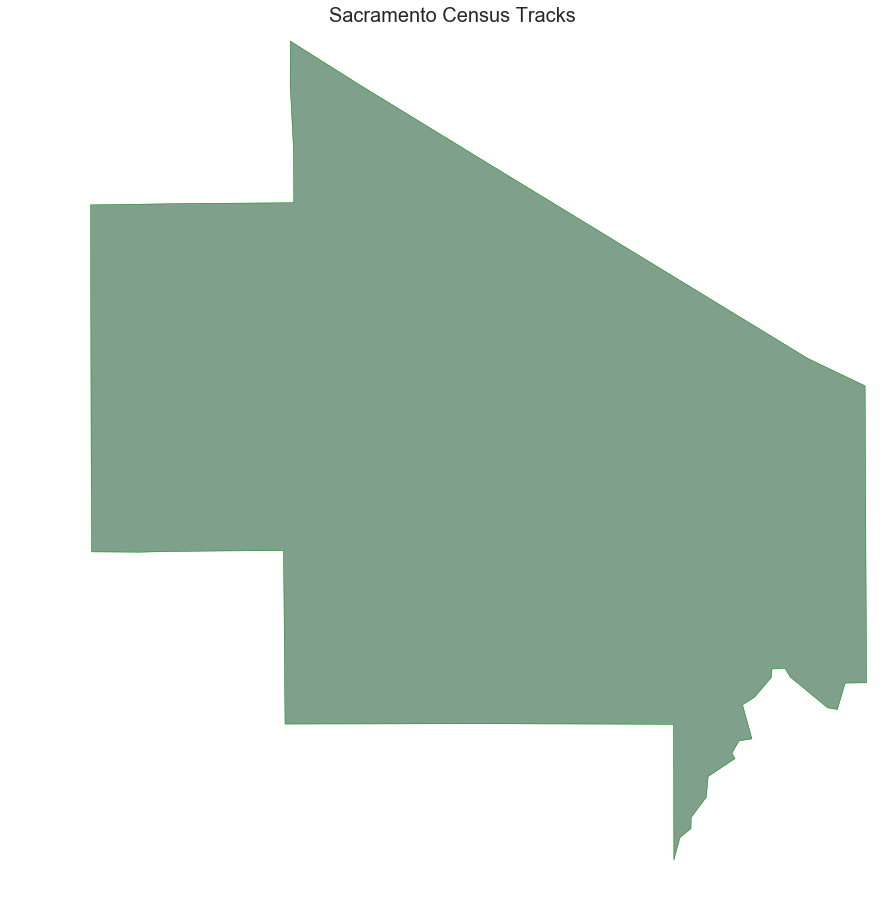

In [33]:

f, ax = pl.subplots(figsize=(15,15))
sacramento_tracks[sacramento_tracks.TRACTCE=='009201'].plot(c = 'green', linewidth = .5, ax = ax,  cmap = 'Greens', label = 'parks')
#CensusBlocks[CensusBlocks["Within30min"] == True].plot(c = 'blue', linewidth = .5, ax = ax,  cmap = 'Blues', label = 'parks')
pl.axis('off')
ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("Sacramento Census Tracks", size = 20)

In [35]:
df = pd.DataFrame.from_csv('Data/Income_and_Voting_Population_2015.csv')
df.head()

,Census Tract,Median Income,CT,Total Population,Voting Population,White,White %,White Voting Population,Black or African American,Black or African American %,...,Asian Voting Population,Native Hawaiian and Other Pacific Islander alone,Native Hawaiian and Other Pacific Islander %,Native Hawaiian and Other Pacific Islander Voting Population,Some other race,Some other race %,Some other race Voting Population,Two or more races,Two or more races %,Two or more races Voting Population
0,Census Tract 1,95156,100,3763,2983,3438,0.913633,2725.366463,22,0.005846,...,103.846133,0,0.000000,0.000000,18,0.004783,14.268934,126,0.033484,99.882541
1,Census Tract 2,95226,200,3803,3093,3307,0.869577,2689.600578,93,0.024454,...,93.530108,8,0.002104,6.506442,60,0.015777,48.798317,174,0.045753,141.515120
2,Census Tract 3,93813,300,3075,2566,2511,0.816585,2095.358049,9,0.002927,...,208.617886,8,0.002602,6.675772,73,0.023740,60.916423,196,0.063740,163.556423
3,Census Tract 4,53806,400,3860,3507,3023,0.783161,2746.544301,250,0.064767,...,43.610363,0,0.000000,0.000000,46,0.011917,41.793264,383,0.099223,347.974352
4,Census Tract 5,45586,500,3560,3120,2666,0.748876,2336.494382,261,0.073315,...,270.808989,13,0.003652,11.393258,94,0.026404,82.382022,129,0.036236,113.056180


In [49]:
for i in range(len(df.CT)):
    df.loc[i,'TRACTCE'] = '00'+ str(df.loc[i,'CT'])

In [50]:
df.head()

,Census Tract,Median Income,CT,Total Population,Voting Population,White,White %,White Voting Population,Black or African American,Black or African American %,...,Native Hawaiian and Other Pacific Islander alone,Native Hawaiian and Other Pacific Islander %,Native Hawaiian and Other Pacific Islander Voting Population,Some other race,Some other race %,Some other race Voting Population,Two or more races,Two or more races %,Two or more races Voting Population,TRACTCE
0,Census Tract 1,95156,100,3763,2983,3438,0.913633,2725.366463,22,0.005846,...,0,0.000000,0.000000,18,0.004783,14.268934,126,0.033484,99.882541,00100
1,Census Tract 2,95226,200,3803,3093,3307,0.869577,2689.600578,93,0.024454,...,8,0.002104,6.506442,60,0.015777,48.798317,174,0.045753,141.515120,00200
2,Census Tract 3,93813,300,3075,2566,2511,0.816585,2095.358049,9,0.002927,...,8,0.002602,6.675772,73,0.023740,60.916423,196,0.063740,163.556423,00300
3,Census Tract 4,53806,400,3860,3507,3023,0.783161,2746.544301,250,0.064767,...,0,0.000000,0.000000,46,0.011917,41.793264,383,0.099223,347.974352,00400
4,Census Tract 5,45586,500,3560,3120,2666,0.748876,2336.494382,261,0.073315,...,13,0.003652,11.393258,94,0.026404,82.382022,129,0.036236,113.056180,00500


In [38]:
len(df)

317

In [52]:
sacramento_tracks.head(2)

,AFFGEOID,ALAND,AWATER,COUNTYFP,GEOID,LSAD,NAME,STATEFP,TRACTCE,geometry
435,1400000US06067000300,1427327,2502,067,06067000300,CT,3,06,000300,"POLYGON ((-121.462834 38.578234, -121.461426 3..."
436,1400000US06067000500,866054,0,067,06067000500,CT,5,06,000500,"POLYGON ((-121.488659 38.584524, -121.488423 3..."


In [39]:
len(sacramento_tracks)

317

In [63]:
sacramento_tracks = sacramento_tracks.merge(df, on='TRACTCE')

In [69]:
pd.set_option('display.max_columns', None)

In [70]:
sacramento_tracks.iloc[:,:]

,AFFGEOID,ALAND,AWATER,COUNTYFP,GEOID,LSAD,NAME,STATEFP,TRACTCE,geometry,Census Tract,Median Income,CT,Total Population,Voting Population,White,White %,White Voting Population,Black or African American,Black or African American %,Black or African American Voting Population,American Indian and Alaska Native,American Indian and Alaska Native %,American Indian and Alaska Native Voting Population,Asian,Asian %,Asian Voting Population,Native Hawaiian and Other Pacific Islander alone,Native Hawaiian and Other Pacific Islander %,Native Hawaiian and Other Pacific Islander Voting Population,Some other race,Some other race %,Some other race Voting Population,Two or more races,Two or more races %,Two or more races Voting Population
0,1400000US06067002500,984312,0,067,06067002500,CT,25,06,002500,"POLYGON ((-121.488236 38.55264, -121.487856 38...",Census Tract 25,96023,2500,1661,1244,1397,0.841060,1046.278146,62,0.037327,46.434678,0,0.000000,0.000000,95,0.057194,71.149910,0,0.000000,0.000000,16,0.009633,11.983143,91,0.054786,68.154124
1,1400000US06067003204,1599411,0,067,06067003204,CT,32.04,06,003204,"POLYGON ((-121.427515 38.525077, -121.420091 3...",Census Tract 32.04,34231,3204,5618,4192,2002,0.356355,1493.838377,429,0.076362,320.108224,25,0.004450,18.654325,2438,0.433962,1819.169811,31,0.005518,23.131363,483,0.085974,360.401566,210,0.037380,156.696333
2,1400000US06067004100,2033367,0,067,06067004100,CT,41,06,004100,"POLYGON ((-121.483144 38.521114, -121.478672 3...",Census Tract 41,27474,4100,4979,3448,2087,0.419160,1445.265314,615,0.123519,425.892750,70,0.014059,48.475598,1637,0.328781,1133.636473,49,0.009841,33.932918,312,0.062663,216.062663,209,0.041976,144.734284
3,1400000US06067004402,1240513,0,067,06067004402,CT,44.02,06,004402,"POLYGON ((-121.46476 38.539527, -121.463748 38...",Census Tract 44.02,24225,4402,4688,3064,2014,0.429608,1316.317406,493,0.105162,322.216724,0,0.000000,0.000000,771,0.164462,503.912969,0,0.000000,0.000000,1032,0.220137,674.498294,378,0.080631,247.054608
4,1400000US06067004802,1423403,0,067,06067004802,CT,48.02,06,004802,"POLYGON ((-121.42921 38.501566, -121.428198 38...",Census Tract 48.02,34161,4802,4799,3346,1656,0.345072,1154.610544,672,0.140029,468.537612,29,0.006043,20.219629,1479,0.308189,1031.201084,35,0.007293,24.403001,617,0.128568,430.190040,311,0.064805,216.838091
5,1400000US06067005002,3064830,0,067,06067005002,CT,50.02,06,005002,"POLYGON ((-121.441512 38.496108, -121.429081 3...",Census Tract 50.02,26628,5002,6383,4931,2630,0.412032,2031.729594,1376,0.215573,1062.988563,28,0.004387,21.630581,1378,0.215886,1064.533605,200,0.031333,154.504152,343,0.053736,264.974620,428,0.067053,330.638885
6,1400000US06067005202,1759096,113923,067,06067005202,CT,52.02,06,005202,"POLYGON ((-121.409435 38.557678, -121.409265 3...",Census Tract 52.02,63065,5202,3454,2971,2748,0.795599,2363.725536,161,0.046613,138.486103,52,0.015055,44.728431,137,0.039664,117.842212,0,0.000000,0.000000,166,0.048060,142.786914,190,0.055009,163.430805
7,1400000US06067005801,2640616,0,067,06067005801,CT,58.01,06,005801,"POLYGON ((-121.364566 38.601092, -121.364559 3...",Census Tract 58.01,66167,5801,5356,4274,4401,0.821695,3511.925691,148,0.027633,118.101568,0,0.000000,0.000000,207,0.038648,165.182599,0,0.000000,0.000000,48,0.008962,38.303211,552,0.103062,440.486931
8,1400000US06067006003,1545797,0,067,06067006003,CT,60.03,06,006003,"POLYGON ((-121.382941 38.637155, -121.375283 3...",Census Tract 60.03,39878,6003,4650,3506,3513,0.755484,2648.726452,378,0.081290,285.003871,23,0.004946,17.341505,216,0.046452,162.859355,67,0.014409,50.516559,228,0.049032,171.907097,225,0.048387,169.645161
9,1400000US06067007011,1946694,0,067,06067007011,CT,70.11,06,007011,"POLYGON ((-121.517356 38.625027, -121.512483 3...",Census Tract 70.11,50153,7011,6378,4771,2775,0.435089,2075.811383,1020,0.159925,763.000941,12,0.001881,8.976482,858,0.134525,641.818438,0,0.000000,0.000000,1032,0.161806,771.977422,681,0.106773,509.415334


In [75]:
with open('Data/sacramento_tracks.geojson', 'w') as f:
    f.write(sacramento_tracks.to_json())

In [77]:
df2 = pd.DataFrame.from_csv('Data/Transportation303.csv')
#df2.CT.to_string

In [78]:
df2.head()

,Census Tract,Carpool,Carpool Percent,Car,Car Percent,Public Transport,Public Percent,CT
0,Census Tract 1,146,0.10,1312,0.86,60,0.04,c000100
1,Census Tract 11.01,58,0.07,705,0.89,27,0.03,c001101
2,Census Tract 12,41,0.04,965,0.87,103,0.09,c001200
3,Census Tract 13,113,0.07,1355,0.83,162,0.10,c001300
4,Census Tract 14,56,0.06,935,0.93,11,0.01,c001400


In [91]:
df2['TRACTCE']=0
for i in range(len(df2.CT)):
    df2.loc[i,'TRACTCE'] = df2.loc[i,'CT'][1:]

In [95]:
sacramento_tracks = sacramento_tracks.merge(df2, on='TRACTCE')

In [96]:
with open('Data/sacramento_tracks.geojson', 'w') as f:
    f.write(sacramento_tracks.to_json())